         Date        Open        High         Low       Close    Volume
0  2024-11-29  169.747070  170.125404  168.014647  169.318936   9250700
1  2024-12-02  172.226196  172.843505  169.528014  169.577799  16593400
2  2024-12-03  172.266037  173.560375  171.758250  172.365592  15721500
3  2024-12-04  175.322678  175.661192  171.997235  172.027103  18239800
4  2024-12-05  173.550430  176.935624  173.251735  176.547324  16145500


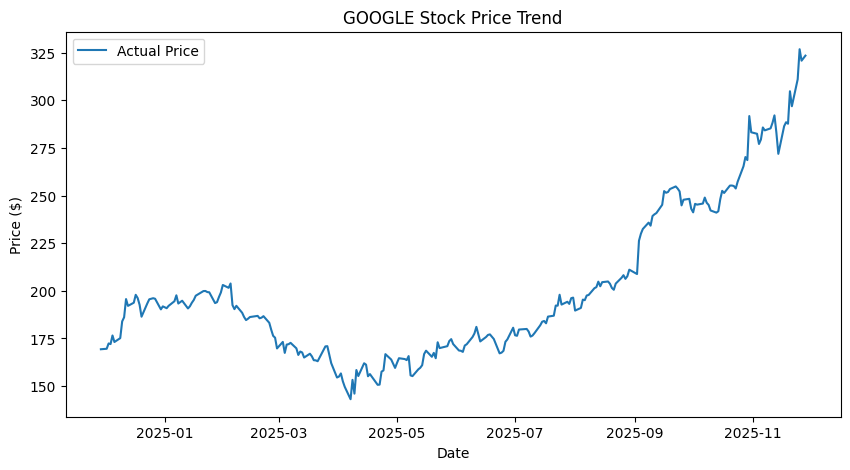

c:\Users\acer\Desktop\StockPricePrediction-cn\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(



Predicted Prices for Next 10 Days:
Day 1: $250.47
Day 2: $250.87
Day 3: $251.27
Day 4: $251.67
Day 5: $252.07
Day 6: $252.47
Day 7: $252.86
Day 8: $253.26
Day 9: $253.66
Day 10: $254.06


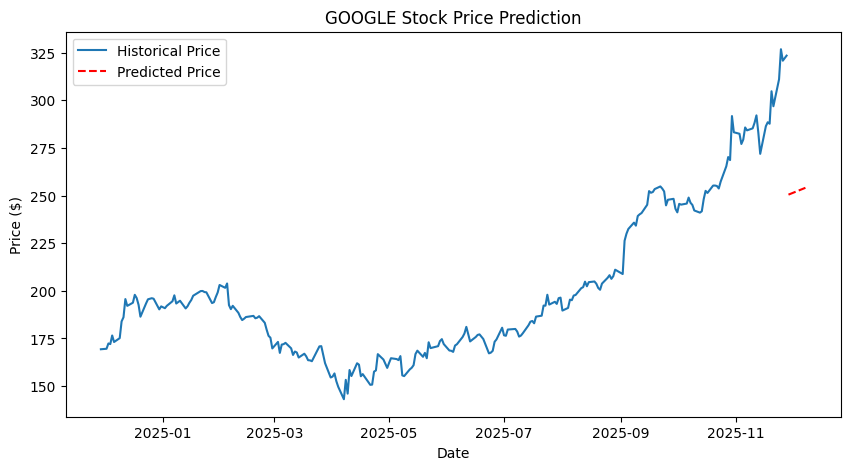

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Load CSV
data = pd.read_csv("../output/GOOG.csv", skiprows=2)

# Clean column names
data.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
print(data.head())  # verify names

# Drop NaN rows
data = data.dropna()

# Convert types
data['Date'] = pd.to_datetime(data['Date'])
data['Close'] = data['Close'].astype(float)

# Plot actual price
plt.figure(figsize=(10,5))
plt.plot(data['Date'], data['Close'], label='Actual Price')
plt.title("GOOGLE Stock Price Trend")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

# Prepare for prediction
data['Days'] = np.arange(len(data))
X = data[['Days']]
y = data['Close']

# Train linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict next 10 days
future_days = np.arange(len(data), len(data)+10).reshape(-1, 1)
predictions = model.predict(future_days)

# Show predictions
print("\nPredicted Prices for Next 10 Days:")
for i, price in enumerate(predictions, start=1):
    print(f"Day {i}: ${price:.2f}")

# Plot prediction
plt.figure(figsize=(10,5))
plt.plot(data['Date'], data['Close'], label='Historical Price')
future_dates = pd.date_range(data['Date'].iloc[-1], periods=11, freq='D')[1:]
plt.plot(future_dates, predictions, 'r--', label='Predicted Price')
plt.title("GOOGLE Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.show()
